# Import Library

In [1]:
# Data manipulation and analysis
import polars as pl
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Understanding

## Import Dataset

In [2]:
# Read Excel data with Polars (requires pyxlsb or openpyxl for .xlsx)
df = pl.read_excel('Insurance Data.xlsx')

# Display the first few rows
df

Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group
str,i64,str,str,str,str,str,str,str,str,str,date,date,str,i64,str,i64,f64,f64,str,str,str,str,str,str,i64,i64,str,str,str
"""CUST000001""",43,"""Female""","""Married""","""Student""","""Medium""","""High School""","""Suburban""","""West Lisa""","""Inactive""","""Frequent""",2023-01-16,2024-08-22,"""3+ Claims""",5,"""Life""",277063,2122.99,868.09,"""Quarterly""","""Eco-Friendly""","""SMS""","""Morning""","""Mandarin""","""Low""",4,470,"""Minor Violations""","""Retirement""","""C"""
"""CUST000002""",22,"""Female""","""Married""","""Student""","""Medium""","""Master""","""Urban""","""Tyroneville""","""""","""One-time""",2022-03-21,2024-11-07,"""No Claims""",10,"""Life""",102202,4928.58,782.75,"""Semi-Annual""","""Eco-Friendly""","""Email""","""Evening""","""Indonesian""","""Low""",3,577,"""Clean""","""Divorce""","""A"""
"""CUST000003""",63,"""Male""","""Divorced""","""Retired""","""Low""","""High School""","""Urban""","""Jaredbury""","""Occasional""","""Infrequent""",2020-10-21,2024-12-20,"""No Claims""",13,"""Home""",468469,4528.29,1283.98,"""Semi-Annual""","""Fast Service""","""Phone""","""Morning""","""Spanish""","""Medium""",3,390,"""Major Violations""","""Divorce""","""B"""
"""CUST000004""",60,"""Female""","""Widowed""","""Business Owner""","""High""","""Bachelor""","""Suburban""","""Johnhaven""","""Active""","""One-time""",2021-09-02,2024-07-29,"""No Claims""",13,"""Multiple""",819239,1415.09,1502.43,"""Monthly""","""Eco-Friendly""","""Phone""","""Evening""","""Spanish""","""Low""",4,662,"""Minor Violations""","""Marriage""","""D"""
"""CUST000005""",55,"""Male""","""Married""","""Teacher""","""Medium""","""PhD""","""Suburban""","""Davidton""","""Active""","""Infrequent""",2020-11-10,2025-02-27,"""1-2 Claims""",17,"""Health""",914230,3892.71,1584.62,"""Annual""","""Comprehensive Coverage""","""SMS""","""Morning""","""French""","""Low""",0,340,"""Major Violations""","""Childbirth""","""B"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""CUST149996""",20,"""Female""","""Divorced""","""Business Owner""","""High""","""""","""Urban""","""Bensonview""","""Occasional""","""One-time""",2022-01-02,2024-06-13,"""3+ Claims""",12,"""Multiple""",243014,1430.08,1502.58,"""Annual""","""Fast Service""","""Phone""","""Morning""","""French""","""Low""",0,484,"""Clean""","""Marriage""","""A"""
"""CUST149997""",19,"""Female""","""Married""","""Retired""","""High""","""PhD""","""Rural""","""East Brian""","""New""","""Infrequent""",2022-05-07,2025-01-30,"""No Claims""",8,"""Home""",564522,1093.55,1995.5,"""Annual""","""Eco-Friendly""","""SMS""","""Afternoon""","""Spanish""","""Low""",1,789,"""Minor Violations""","""Divorce""","""D"""
"""CUST149998""",57,"""Male""","""Married""","""Teacher""","""""","""High School""","""Suburban""","""Tammyfort""","""Active""","""Frequent""",2023-11-27,2025-04-07,"""3+ Claims""",7,"""Home""",658445,4999.39,141.81,"""Annual""","""Comprehensive Coverage""","""Email""","""Afternoon""","""Spanish""","""High""",1,337,"""Clean""","""Childbirth""","""A"""


## Informasi Data

In [3]:
print(f"Rows: {df.height}, Columns: {df.width}")


Rows: 150000, Columns: 30


In [4]:
print("Columns:")
df.columns

Columns:


['Customer ID',
 'Age',
 'Gender',
 'Marital Status',
 'Occupation',
 'Income Level',
 'Education Level',
 'Geographic Information',
 'Location',
 'Behavioral Data',
 'Purchase History',
 'Policy Start Date',
 'Policy Renewal Date',
 'Claim History',
 'Interactions with Customer Service',
 'Insurance Products Owned',
 'Coverage Amount',
 'Premium Amount',
 'Deductible',
 'Policy Type',
 'Customer Preferences',
 'Preferred Communication Channel',
 'Preferred Contact Time',
 'Preferred Language',
 'Risk Profile',
 'Previous Claims History',
 'Credit Score',
 'Driving Record',
 'Life Events',
 'Segmentation Group']

In [5]:
print("Data types:")
df.dtypes

Data types:


[String,
 Int64,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 String,
 Date,
 Date,
 String,
 Int64,
 String,
 Int64,
 Float64,
 Float64,
 String,
 String,
 String,
 String,
 String,
 String,
 Int64,
 Int64,
 String,
 String,
 String]

In [6]:
categorical_cols = [
    'Gender', 'Marital Status', 'Occupation', 'Income Level', 'Education Level',
    'Geographic Information', 'Behavioral Data', 'Purchase History', 'Claim History', 'Insurance Products Owned',
    'Policy Type', 'Customer Preferences', 'Preferred Communication Channel',
    'Preferred Contact Time', 'Preferred Language', 'Risk Profile',
    'Driving Record', 'Life Events', 'Segmentation Group'
]

for col in categorical_cols:
    if col in df.columns:
        unique_vals = df.select(pl.col(col).unique())[col].to_list()
        print(f"Unique values in '{col}' ({len(unique_vals)} total): {unique_vals}")
    else:
        print(f"Column '{col}' not found in DataFrame.")


Unique values in 'Gender' (3 total): ['Female', 'Male', 'Non-Binary']
Unique values in 'Marital Status' (4 total): ['Single', 'Married', 'Widowed', 'Divorced']
Unique values in 'Occupation' (8 total): ['Unemployed', 'Lawyer', 'Engineer', 'Student', 'Retired', 'Business Owner', 'Doctor', 'Teacher']
Unique values in 'Income Level' (5 total): ['High', 'Low', 'Medium', 'Very High', '']
Unique values in 'Education Level' (5 total): ['Master', 'Bachelor', 'High School', '', 'PhD']
Unique values in 'Geographic Information' (3 total): ['Suburban', 'Urban', 'Rural']
Unique values in 'Behavioral Data' (5 total): ['Active', 'New', 'Inactive', '', 'Occasional']
Unique values in 'Purchase History' (3 total): ['Frequent', 'Infrequent', 'One-time']
Unique values in 'Claim History' (4 total): ['1-2 Claims', '', 'No Claims', '3+ Claims']
Unique values in 'Insurance Products Owned' (6 total): ['Life', 'Health', 'Home', 'Travel', 'Auto', 'Multiple']
Unique values in 'Policy Type' (4 total): ['Semi-Annual

## Deskripsi Dataset

In [7]:
# Select only numeric columns (integer and float)
numeric_types = [pl.Int8, pl.Int16, pl.Int32, pl.Int64, pl.UInt8, pl.UInt16, pl.UInt32, pl.UInt64, pl.Float32, pl.Float64]
numeric_cols = [col for col, dtype in zip(df.columns, df.dtypes) if dtype in numeric_types]

# Describe only numeric columns
df.select(numeric_cols).describe()

statistic,Age,Interactions with Customer Service,Coverage Amount,Premium Amount,Deductible,Previous Claims History,Credit Score
str,f64,f64,f64,f64,f64,f64,f64
"""count""",150000.0,150000.0,150000.0,150000.0,150000.0,150000.0,150000.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",48.4473,9.470887,504721.832553,2545.394752,1051.883134,1.996993,573.902347
"""std""",17.909818,5.77012,285601.378292,1416.633851,549.612108,1.412996,158.736283
"""min""",18.0,0.0,10001.0,100.0,100.01,0.0,300.0
"""25%""",33.0,4.0,257403.0,1315.76,575.77,1.0,437.0
"""50%""",48.0,9.0,504614.0,2545.04,1050.31,2.0,573.0
"""75%""",64.0,14.0,751410.0,3772.11,1529.88,3.0,711.0
"""max""",79.0,19.0,999996.0,4999.96,1999.99,4.0,849.0


## Cek Missing Values

In [8]:
import polars as pl

missing_counts = []
for col in df.columns:
    if df[col].dtype == pl.Utf8:
        missing_counts.append((df[col] == '').sum())
    else:
        missing_counts.append(0)

missing_df = pl.DataFrame([missing_counts], schema=df.columns)
print("Missing values per column:")
missing_df

Missing values per column:


C:\Users\acer\AppData\Local\Temp\ipykernel_16744\56471726.py:10: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  missing_df = pl.DataFrame([missing_counts], schema=df.columns)


Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
0,0,0,0,0,7500,7500,0,0,7500,0,0,0,7500,0,0,0,0,0,0,0,0,0,0,7500,0,0,0,0,0


## Cek Duplikat Data

In [9]:
num_duplicates = df.is_duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


# Data Visualization

In [10]:
pdf = df.to_pandas()

## Visualisasi Data Numerik

### Visualisasi Histogram

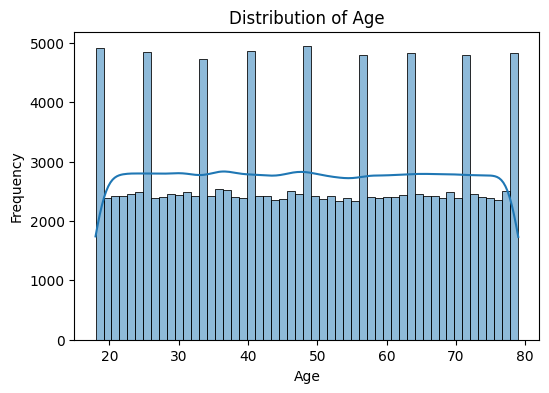

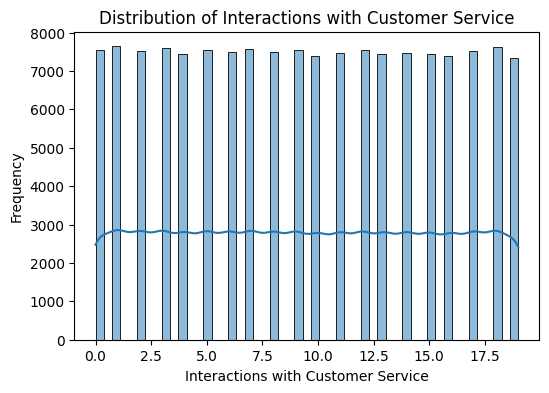

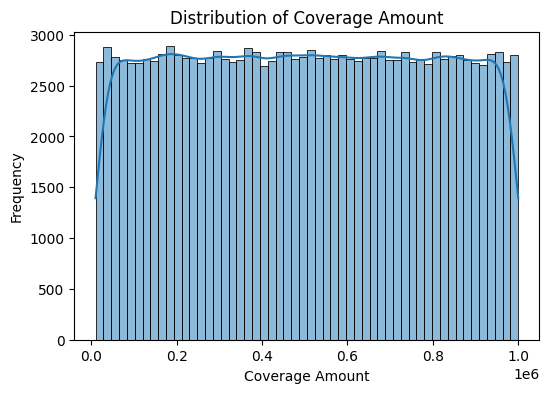

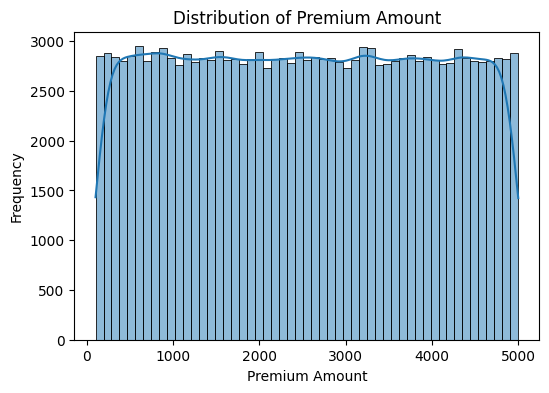

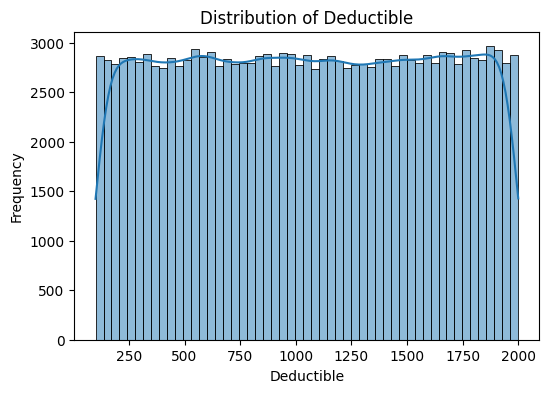

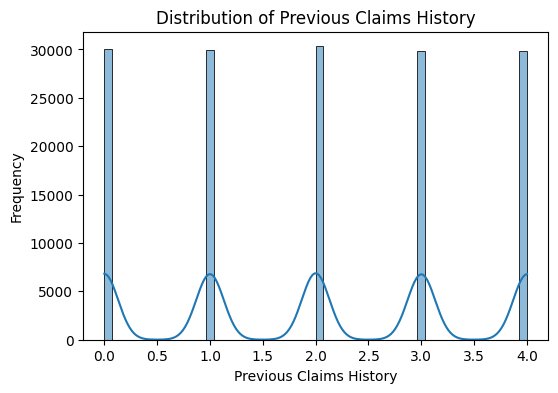

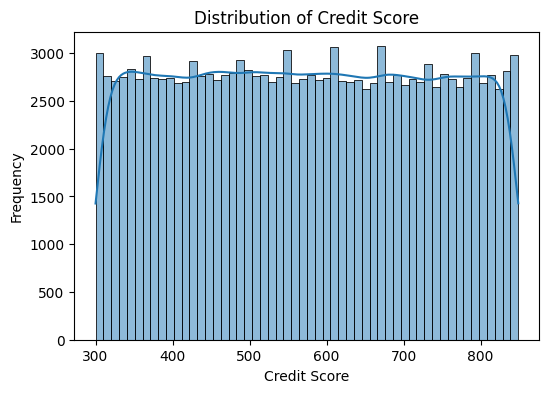

In [11]:
distribution_cols = pdf.select_dtypes(include=['number']).columns
for col in distribution_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(pdf[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Visualisasi Boxplot

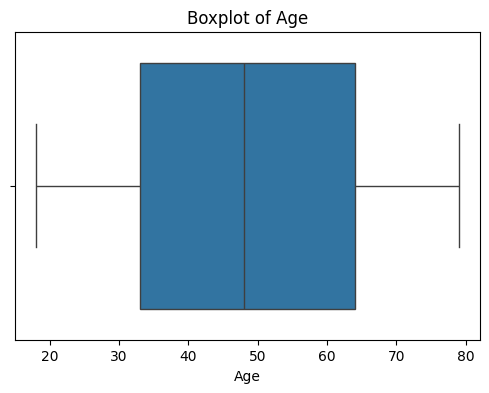

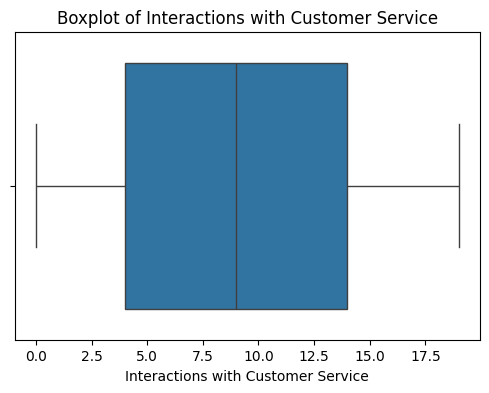

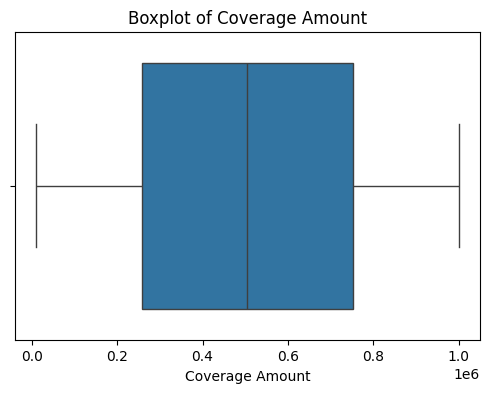

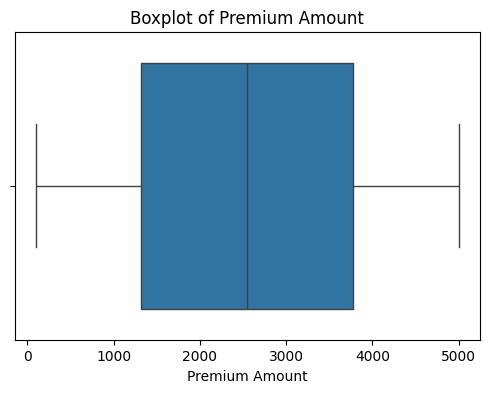

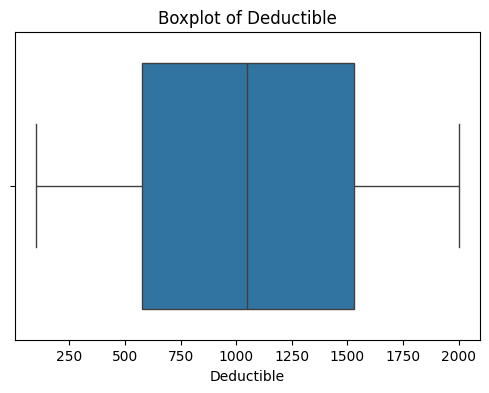

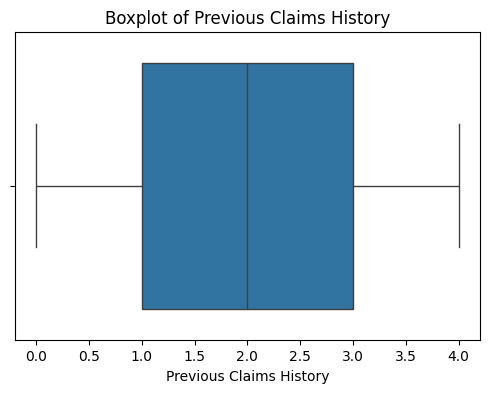

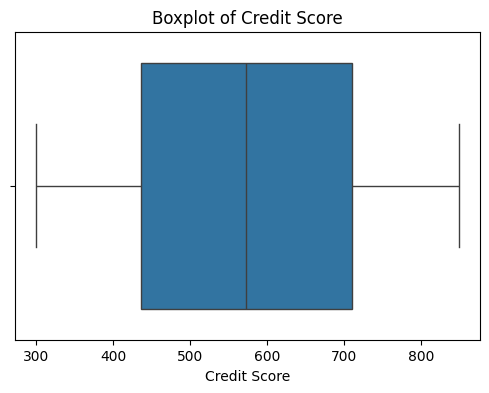

In [12]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=pdf[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

### Visualisasi Korelasi Heatmap

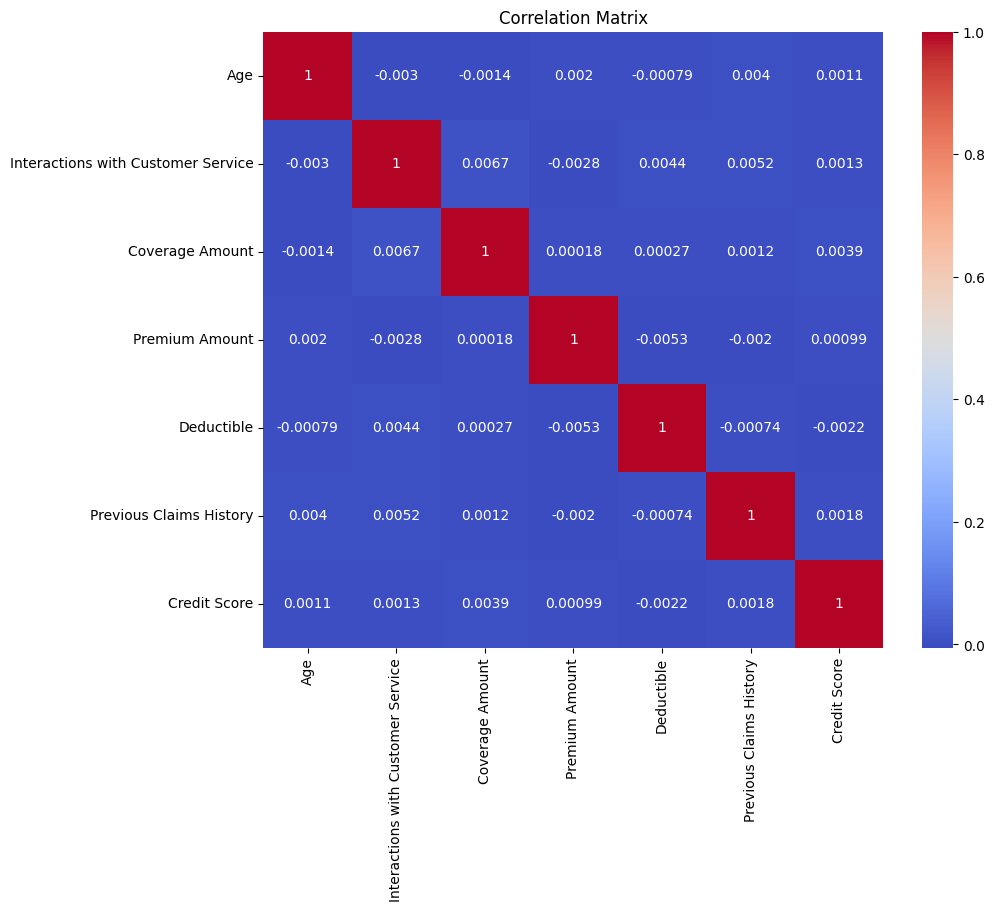

In [13]:
plt.figure(figsize=(10, 8))
corr = pdf[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Visualisasi Data Kategorik

### Visualisasi Histogram

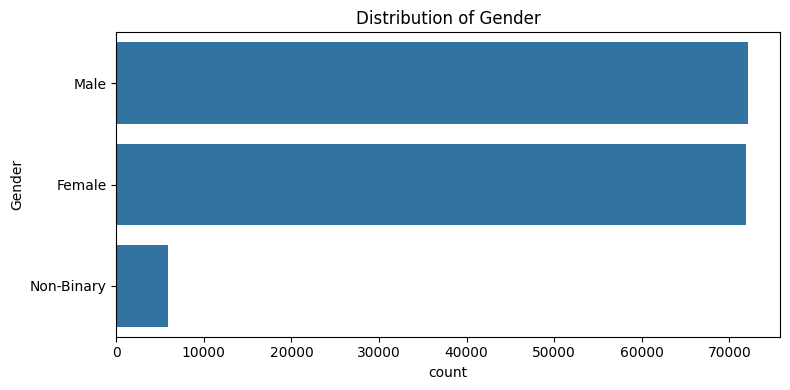

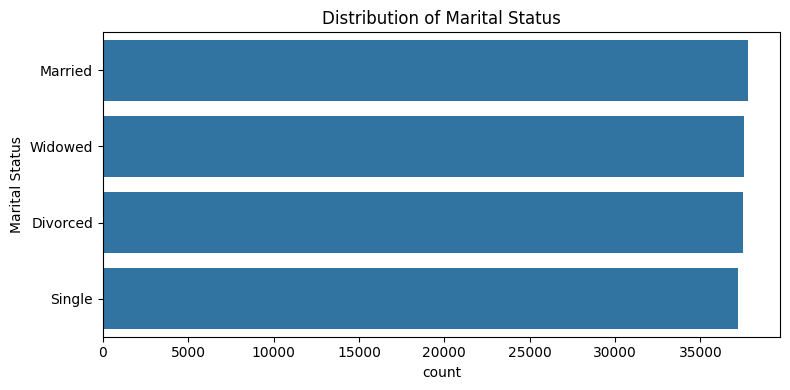

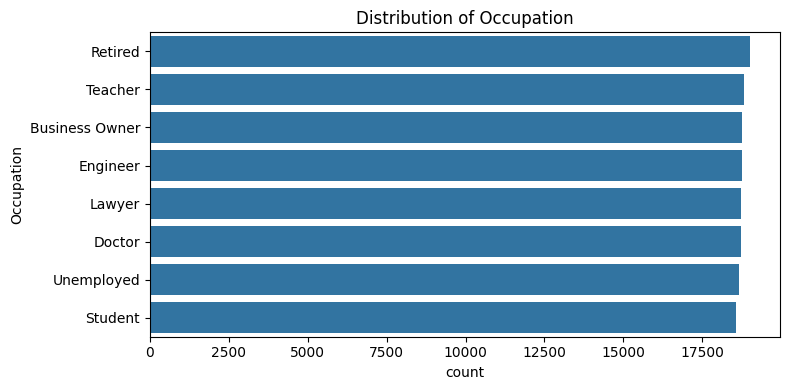

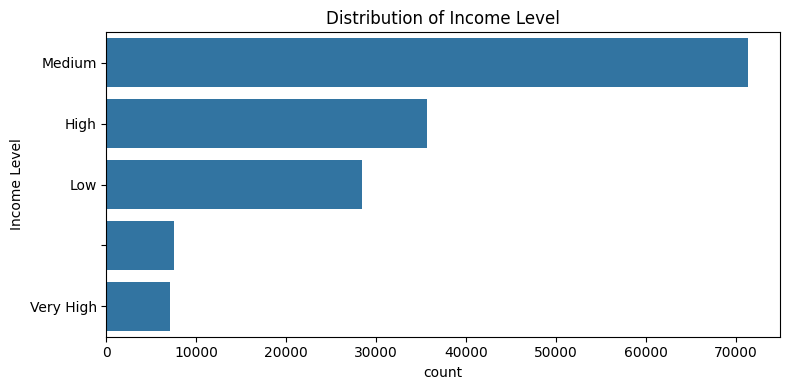

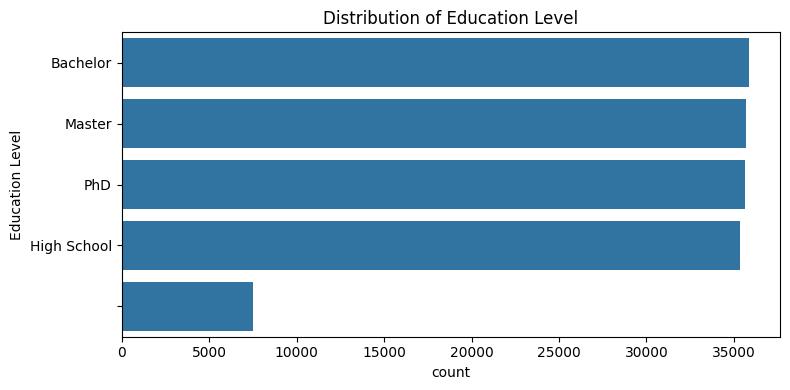

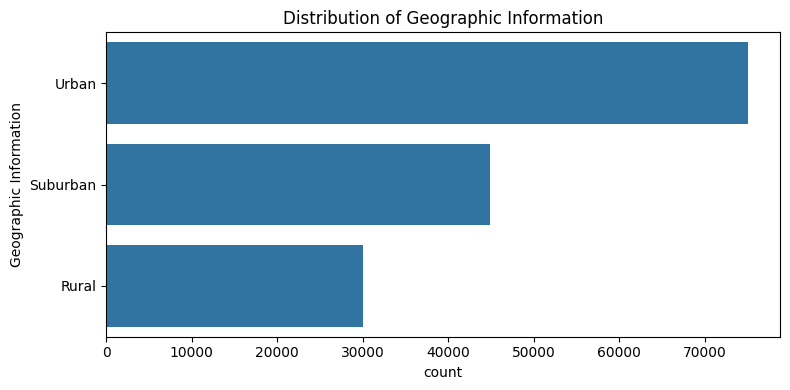

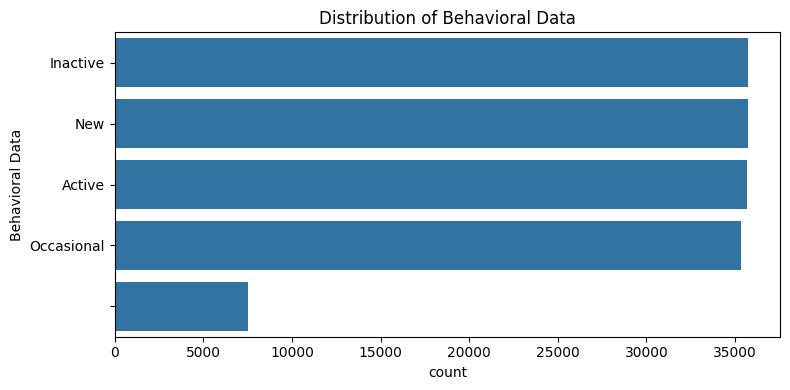

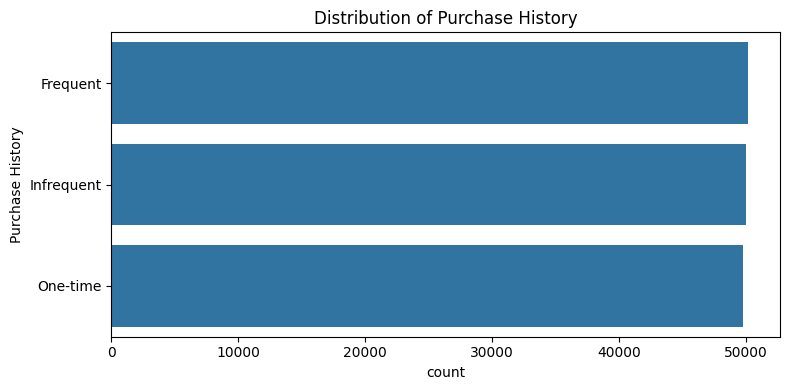

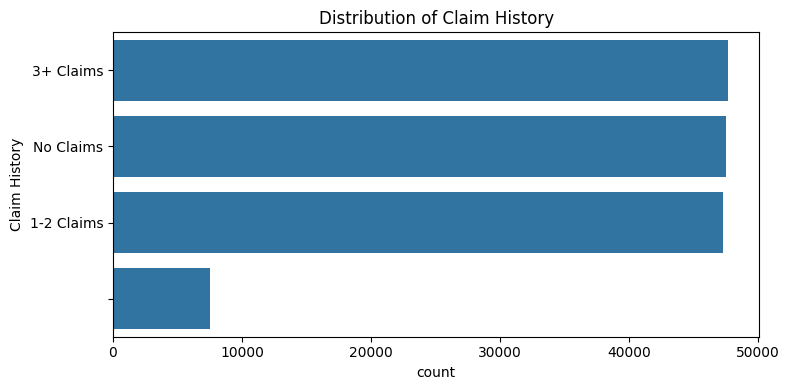

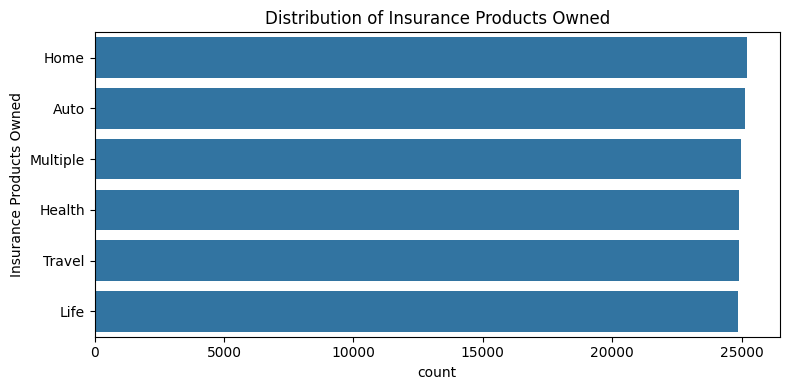

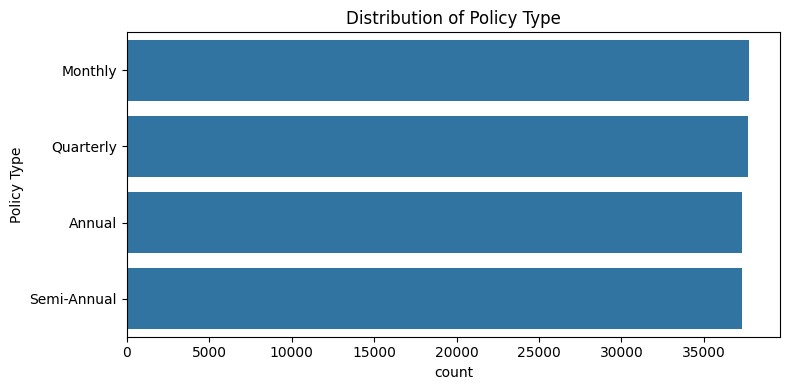

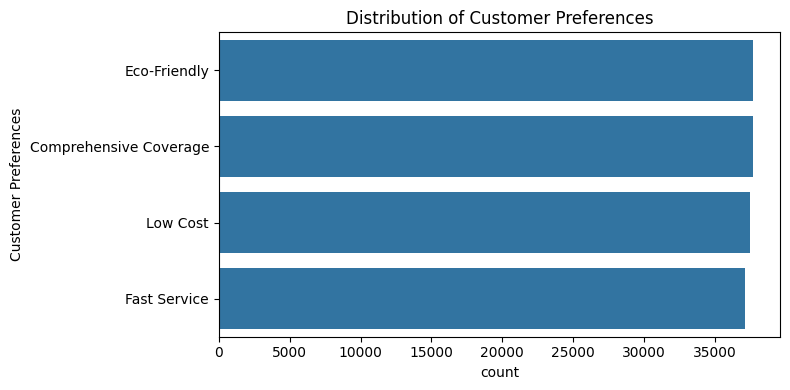

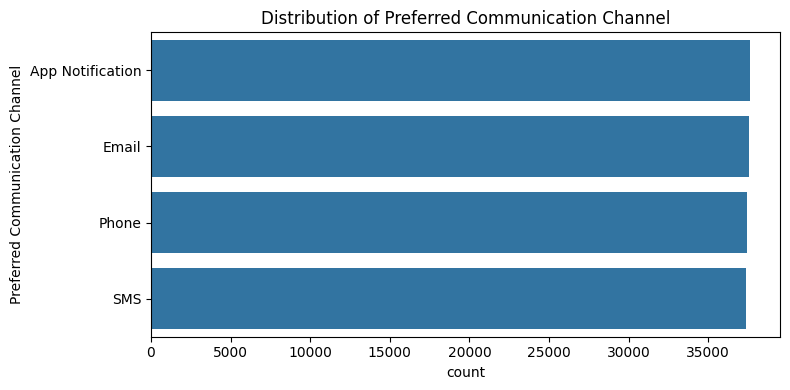

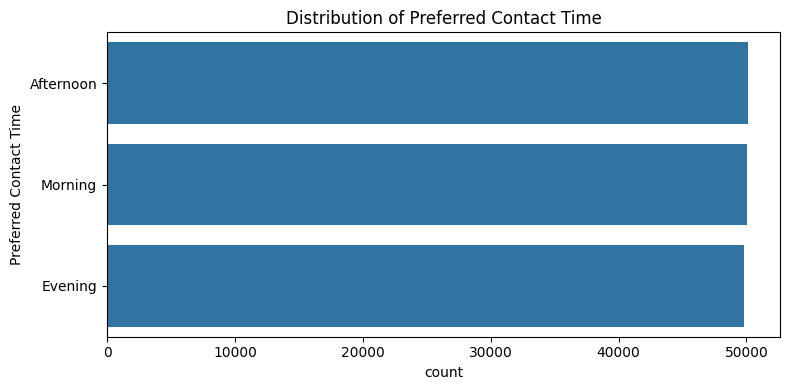

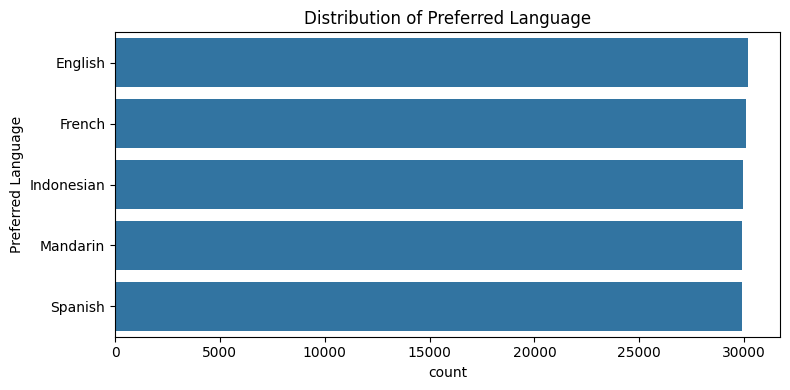

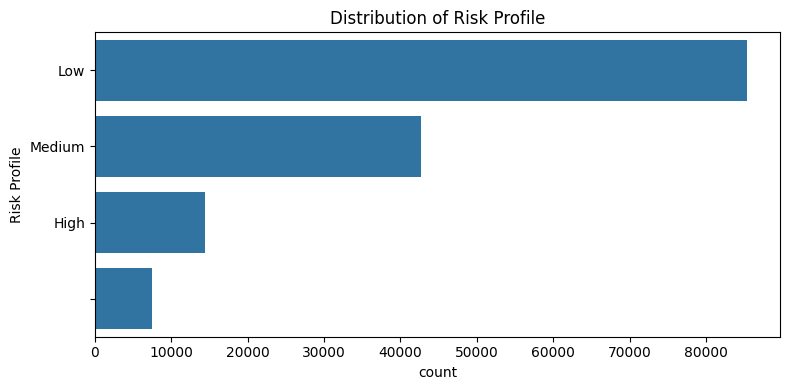

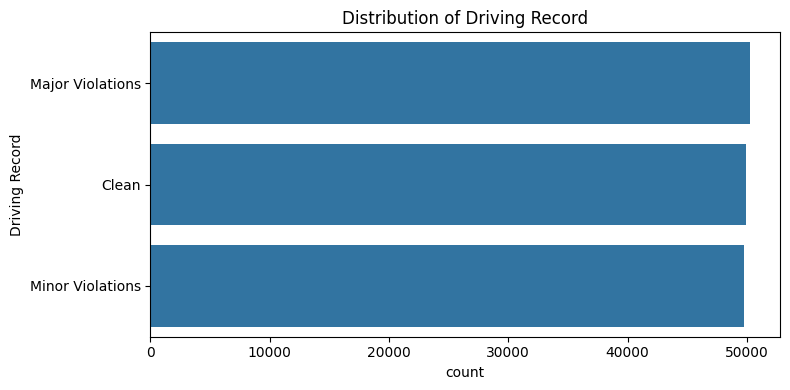

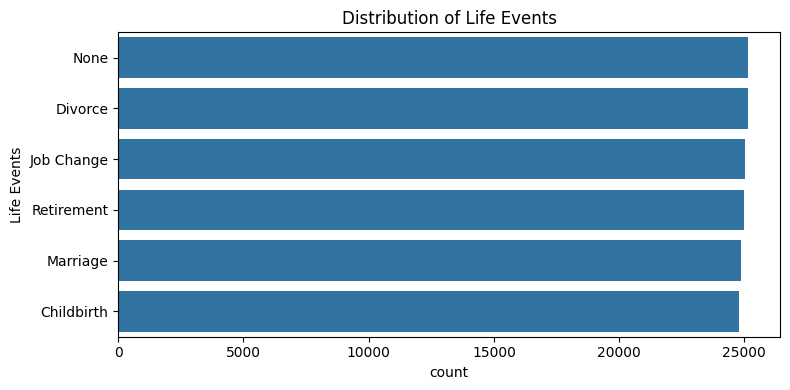

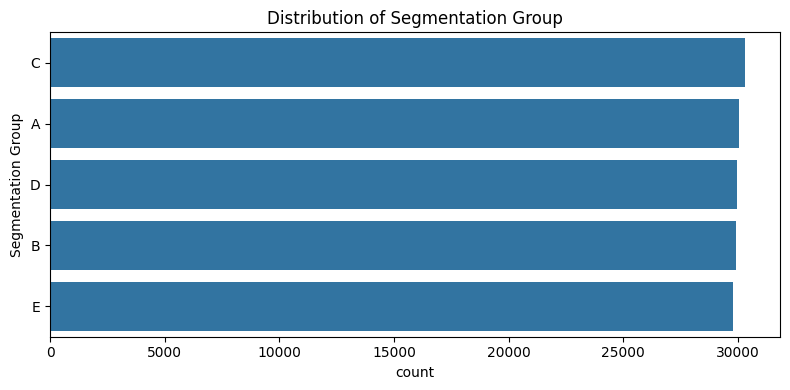

In [14]:
# List of categorical columns to visualize
categorical_cols = [
    'Gender', 'Marital Status', 'Occupation', 'Income Level', 'Education Level',
    'Geographic Information', 'Behavioral Data', 'Purchase History', 'Claim History', 'Insurance Products Owned',
    'Policy Type', 'Customer Preferences', 'Preferred Communication Channel',
    'Preferred Contact Time', 'Preferred Language', 'Risk Profile',
    'Driving Record', 'Life Events', 'Segmentation Group'
]

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=df[col].to_pandas(), order=df[col].to_pandas().value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

## Visualisasi Distribusi Target

### Visualisasi Histogram

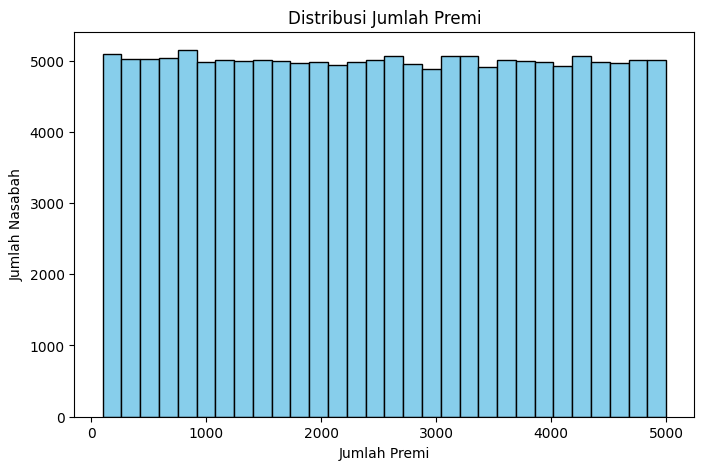

In [15]:
plt.figure(figsize=(8, 5))
plt.hist(df['Premium Amount'].to_pandas(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Jumlah Premi')
plt.xlabel('Jumlah Premi')
plt.ylabel('Jumlah Nasabah')
plt.show()

# Data Prepocessing

## Handling Missing Values

In [16]:
for col in ['Income Level', 'Education Level', 'Behavioral Data', 'Claim History', 'Risk Profile']:
    mode = df.filter(pl.col(col) != '').select(pl.col(col)).to_series().mode()[0]
    df = df.with_columns(
        pl.when(pl.col(col) == '').then(pl.lit(mode)).otherwise(pl.col(col)).alias(col)
    )

In [17]:
missing_counts_after = []
for col in df.columns:
    if df[col].dtype == pl.Utf8:
        missing_counts_after.append((df[col] == '').sum())
    else:
        missing_counts_after.append(0)

missing_df_after = pl.DataFrame([missing_counts_after], schema=df.columns)
print("Missing values per column setelah imputasi:")
missing_df_after

Missing values per column setelah imputasi:


C:\Users\acer\AppData\Local\Temp\ipykernel_16744\1576231910.py:8: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  missing_df_after = pl.DataFrame([missing_counts_after], schema=df.columns)


Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Feature Engineering

In [18]:
def map_categorical(col_name: str, mapping: dict, default=0):
    expr = None
    for key, val in mapping.items():
        cond = (pl.col(col_name) == key)
        if expr is None:
            expr = pl.when(cond).then(val)
        else:
            expr = expr.when(cond).then(val)
    expr = expr.otherwise(default)
    return expr.alias(col_name)

In [19]:
def feature_engineering(df: pl.DataFrame) -> pl.DataFrame:
    # Parsing tanggal hanya jika belum bertipe Date
    for col in ["Policy Start Date", "Policy Renewal Date"]:
        if df[col].dtype != pl.Date:
            df = df.with_columns([
                pl.col(col).str.strptime(pl.Date).alias(col)
            ])
    
    # Hitung durasi polis dalam hari dan bulan
    df = df.with_columns(
        (pl.col("Policy Renewal Date").cast(pl.Int64) - pl.col("Policy Start Date").cast(pl.Int64))
        .alias("Policy Duration Days")
    )
    
    df = df.with_columns(
        (pl.col("Policy Duration Days") / 30).cast(pl.Int32).alias("Policy Duration Months")
    )
    
    # Mapping kategori ke numerik
    risk_profile_map = {"Low": 1, "Medium": 2, "High": 3}
    df = df.with_columns([
        map_categorical("Risk Profile", risk_profile_map)
    ])
    
    income_level_map = {"Low": 1, "Medium": 2, "High": 3, "Very High": 4}
    df = df.with_columns([
        map_categorical("Income Level", income_level_map)
    ])
    
    marital_status_map = {"Single": 1, "Married": 2, "Divorced": 3, "Widowed": 4}
    df = df.with_columns([
        map_categorical("Marital Status", marital_status_map)
    ])
    
    # Mapping Driving Record
    driving_record_map = {"Clean": 0, "Minor Violations": 1, "Major Violations": 2}
    df = df.with_columns([
        map_categorical("Driving Record", driving_record_map)
    ])
    
    # Mapping Life Events (contoh)
    life_events_map = {
        "None": 0,
        "Marriage": 1,
        "Childbirth": 1,
        "Divorce": 2,
        "Retirement": 3
    }
    df = df.with_columns([
        map_categorical("Life Events", life_events_map)
    ])
    
    # Mapping Segmentation Group (jika kategori)
    segmentation_map = {k: i for i, k in enumerate(df.select("Segmentation Group").unique().to_series().to_list())}
    df = df.with_columns([
        map_categorical("Segmentation Group", segmentation_map)
    ])
    
    # Binning Age menjadi kategori umur
    if "Age" in df.columns:
        df = df.with_columns([
            pl.when(pl.col("Age") < 30).then(pl.lit("Young"))
            .when((pl.col("Age") >= 30) & (pl.col("Age") < 50)).then(pl.lit("Middle-Aged"))
            .otherwise(pl.lit("Senior"))
            .alias("Age Group")
        ])
    
    # Interaksi fitur
    if "Age" in df.columns and "Coverage Amount" in df.columns:
        df = df.with_columns([
            (pl.col("Age") * pl.col("Coverage Amount")).alias("Age_Coverage_Interaction")
        ])
    if "Coverage Amount" in df.columns and "Deductible" in df.columns:
        df = df.with_columns([
            (pl.col("Coverage Amount") * pl.col("Deductible")).alias("Coverage_Deductible_Interaction")
        ])
    if "Credit Score" in df.columns and "Risk Profile" in df.columns:
        df = df.with_columns([
            (pl.col("Credit Score") * pl.col("Risk Profile")).alias("Credit_Risk_Interaction")
        ])
    if "Income Level" in df.columns and "Marital Status" in df.columns:
        df = df.with_columns([
            (pl.col("Income Level") * pl.col("Marital Status")).alias("Income_Marital_Interaction")
        ])
    
    # Log transform untuk fitur skewed
    if "Coverage Amount" in df.columns:
        df = df.with_columns([
            pl.col("Coverage Amount").log1p().alias("Log Coverage Amount")
        ])
    if "Deductible" in df.columns:
        df = df.with_columns([
            pl.col("Deductible").log1p().alias("Log Deductible")
        ])
    
    # Ekstrak fitur tanggal tambahan
    df = df.with_columns([
        pl.col("Policy Start Date").dt.month().alias("Policy Start Month"),
        pl.col("Policy Start Date").dt.year().alias("Policy Start Year"),
        pl.col("Policy Renewal Date").dt.month().alias("Policy Renewal Month"),
        pl.col("Policy Renewal Date").dt.year().alias("Policy Renewal Year"),
    ])
    
    # Fitur klaim ada/tidak
    df = df.with_columns([
        pl.when(pl.col("Claim History") == "No Claims").then(pl.lit(0)).otherwise(pl.lit(1)).alias("Has Claims")
    ])
    
    # Fitur klaim lebih dari 1 (multiple claims)
    df = df.with_columns([
        pl.when(pl.col("Previous Claims History") > 1).then(pl.lit(1)).otherwise(pl.lit(0)).alias("Multiple Claims")
    ])
    
    # Binning untuk Interactions with Customer Service (contoh)
    if "Interactions with Customer Service" in df.columns:
        df = df.with_columns([
            pl.when(pl.col("Interactions with Customer Service") < 5).then(pl.lit("Low"))
            .when((pl.col("Interactions with Customer Service") >= 5) & (pl.col("Interactions with Customer Service") < 15)).then(pl.lit("Medium"))
            .otherwise(pl.lit("High"))
            .alias("Customer Service Interaction Level")
        ])
        # Encode fitur binning
        interaction_map = {"Low": 0, "Medium": 1, "High": 2}
        df = df.with_columns([
            map_categorical("Customer Service Interaction Level", interaction_map)
        ])
    
    # Bisa tambah mapping kategori lain yang relevan sesuai analisis Anda...
    
    return df

In [20]:
df = feature_engineering(df)
df

Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group,Policy Duration Days,Policy Duration Months,Age Group,Age_Coverage_Interaction,Coverage_Deductible_Interaction,Credit_Risk_Interaction,Income_Marital_Interaction,Log Coverage Amount,Log Deductible,Policy Start Month,Policy Start Year,Policy Renewal Month,Policy Renewal Year,Has Claims,Multiple Claims,Customer Service Interaction Level
str,i64,str,i32,str,i32,str,str,str,str,str,date,date,str,i64,str,i64,f64,f64,str,str,str,str,str,i32,i64,i64,i32,i32,i32,i64,i32,str,i64,f64,i64,i32,f64,f64,i8,i32,i8,i32,i32,i32,i32
"""CUST000001""",43,"""Female""",2,"""Student""",2,"""High School""","""Suburban""","""West Lisa""","""Inactive""","""Frequent""",2023-01-16,2024-08-22,"""3+ Claims""",5,"""Life""",277063,2122.99,868.09,"""Quarterly""","""Eco-Friendly""","""SMS""","""Morning""","""Mandarin""",1,4,470,1,3,3,584,19,"""Middle-Aged""",11913709,2.4052e8,470,4,12.532004,6.767447,1,2023,8,2024,1,1,1
"""CUST000002""",22,"""Female""",2,"""Student""",2,"""Master""","""Urban""","""Tyroneville""","""Inactive""","""One-time""",2022-03-21,2024-11-07,"""No Claims""",10,"""Life""",102202,4928.58,782.75,"""Semi-Annual""","""Eco-Friendly""","""Email""","""Evening""","""Indonesian""",1,3,577,0,2,1,962,32,"""Young""",2248444,7.9999e7,577,4,11.534716,6.66409,3,2022,11,2024,0,1,1
"""CUST000003""",63,"""Male""",3,"""Retired""",1,"""High School""","""Urban""","""Jaredbury""","""Occasional""","""Infrequent""",2020-10-21,2024-12-20,"""No Claims""",13,"""Home""",468469,4528.29,1283.98,"""Semi-Annual""","""Fast Service""","""Phone""","""Morning""","""Spanish""",2,3,390,2,2,2,1521,50,"""Senior""",29513547,6.0150e8,780,3,13.057227,7.158498,10,2020,12,2024,0,1,1
"""CUST000004""",60,"""Female""",4,"""Business Owner""",3,"""Bachelor""","""Suburban""","""Johnhaven""","""Active""","""One-time""",2021-09-02,2024-07-29,"""No Claims""",13,"""Multiple""",819239,1415.09,1502.43,"""Monthly""","""Eco-Friendly""","""Phone""","""Evening""","""Spanish""",1,4,662,1,1,4,1061,35,"""Senior""",49154340,1.2308e9,662,12,13.616132,7.315504,9,2021,7,2024,0,1,1
"""CUST000005""",55,"""Male""",2,"""Teacher""",2,"""PhD""","""Suburban""","""Davidton""","""Active""","""Infrequent""",2020-11-10,2025-02-27,"""1-2 Claims""",17,"""Health""",914230,3892.71,1584.62,"""Annual""","""Comprehensive Coverage""","""SMS""","""Morning""","""French""",1,0,340,2,1,2,1570,52,"""Senior""",50282650,1.4487e9,340,4,13.725839,7.368731,11,2020,2,2025,1,0,2
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""CUST149996""",20,"""Female""",3,"""Business Owner""",3,"""Bachelor""","""Urban""","""Bensonview""","""Occasional""","""One-time""",2022-01-02,2024-06-13,"""3+ Claims""",12,"""Multiple""",243014,1430.08,1502.58,"""Annual""","""Fast Service""","""Phone""","""Morning""","""French""",1,0,484,0,1,1,893,29,"""Young""",4860280,3.6515e8,484,9,12.400878,7.315604,1,2022,6,2024,1,0,1
"""CUST149997""",19,"""Female""",2,"""Retired""",3,"""PhD""","""Rural""","""East Brian""","""New""","""Infrequent""",2022-05-07,2025-01-30,"""No Claims""",8,"""Home""",564522,1093.55,1995.5,"""Annual""","""Eco-Friendly""","""SMS""","""Afternoon""","""Spanish""",1,1,789,1,2,4,999,33,"""Young""",10725918,1.1265e9,789,6,13.243736,7.599151,5,2022,1,2025,0,0,1
"""CUST149998""",57,"""Male""",2,"""Teacher""",2,"""High School""","""Suburban""","""Tammyfort""","""Active""","""Frequent""",2023-11-27,2025-04-07,"""3+ Claims""",7,"""Home""",658445,4999.39,141.81,"""Annual""","""Comprehensive Coverage""","""Email""","""Aft

## Encoding Data

In [22]:
import polars as pl
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# List fitur
one_hot_cols = [
    "Gender", "Occupation", "Education Level", "Geographic Information", "Behavioral Data",
    "Purchase History", "Claim History", "Insurance Products Owned", "Policy Type",
    "Customer Preferences", "Preferred Communication Channel", "Preferred Contact Time",
    "Preferred Language", "Driving Record", "Life Events", "Segmentation Group",
    "Age Group", "Customer Service Interaction Level"
]

label_encode_cols = [
    "Marital Status", "Income Level", "Risk Profile", "Previous Claims History",
    "Credit Score", "Multiple Claims", "Interactions with Customer Service",
    "Policy Start Month", "Policy Start Year", "Policy Renewal Month", "Policy Renewal Year",
    "Has Claims", "Driving Record Numeric", "Life Events Numeric", "Segmentation Group Numeric"
]

# 1. Label Encoding untuk fitur ordinal / numerik
def label_encode(df: pl.DataFrame, col: str) -> pl.DataFrame:
    uniques = df.select(pl.col(col)).unique().to_series().to_list()
    mapping = {k: i for i, k in enumerate(uniques)}
    expr = None
    for k, v in mapping.items():
        cond = (pl.col(col) == k)
        if expr is None:
            expr = pl.when(cond).then(v)
        else:
            expr = expr.when(cond).then(v)
    expr = expr.otherwise(-1)
    return df.with_columns(expr.alias(col))

for col in label_encode_cols:
    if col in df.columns:
        df = label_encode(df, col)

# 2. One-Hot Encoding untuk fitur nominal
# Convert subset kategori ke pandas karena sklearn OneHotEncoder bekerja di pandas/numpy
df_pd = df.select(one_hot_cols).to_pandas()

# Buat one-hot encoder dan transform
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
ohe_array = ohe.fit_transform(df_pd)

# Nama kolom hasil one-hot
ohe_cols = ohe.get_feature_names_out(one_hot_cols)

# Buat DataFrame hasil one-hot encoding
df_ohe = pd.DataFrame(ohe_array, columns=ohe_cols, index=df_pd.index)

# Drop kolom kategori asli dari polars df dan convert df ke pandas
df = df.drop(one_hot_cols).to_pandas()

# Gabungkan dengan hasil one-hot encoding
df_final = pd.concat([df, df_ohe], axis=1)

In [24]:
df_final

,Customer ID,Age,Marital Status,Income Level,Location,Policy Start Date,Policy Renewal Date,Interactions with Customer Service,Coverage Amount,Premium Amount,...,Segmentation Group_1,Segmentation Group_2,Segmentation Group_3,Segmentation Group_4,Age Group_Middle-Aged,Age Group_Senior,Age Group_Young,Customer Service Interaction Level_0,Customer Service Interaction Level_1,Customer Service Interaction Level_2
0,CUST000001,43,0,1,West Lisa,2023-01-16,2024-08-22,10,277063,2122.99,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,CUST000002,22,0,1,Tyroneville,2022-03-21,2024-11-07,1,102202,4928.58,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,CUST000003,63,1,2,Jaredbury,2020-10-21,2024-12-20,16,468469,4528.29,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,CUST000004,60,3,0,Johnhaven,2021-09-02,2024-07-29,16,819239,1415.09,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,CUST000005,55,0,1,Davidton,2020-11-10,2025-02-27,2,914230,3892.71,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,CUST149996,20,1,0,Bensonview,2022-01-02,2024-06-13,3,243014,1430.08,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
149996,CUST149997,19,0,0,East Brian,2022-05-07,2025-01-30,17,564522,1093.55,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
149997,CUST149998,57,0,1,Tammyfort,2023-11-27,2025-04-07,0,658445,4999.39,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
149998,CUST149999,44,2,1,Goodwinstad,2022-02-16,2024-07-12,15,956797,3759.32,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Feature Selection

In [ ]:
import polars as pl
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from boruta import BorutaPy
import xgboost as xgb

# Daftar fitur numerik dan hasil encoding
features = [
    "Age", "Gender", "Marital Status", "Occupation", "Income Level", "Education Level",
    "Geographic Information", "Behavioral Data", "Purchase History", "Claim History",
    "Insurance Products Owned", "Policy Type", "Customer Preferences",
    "Preferred Communication Channel", "Preferred Contact Time", "Preferred Language",
    "Risk Profile", "Previous Claims History", "Credit Score", "Driving Record",
    "Life Events", "Segmentation Group", "Policy Duration Days", "Policy Duration Months",
    "Age_Coverage_Interaction", "Coverage_Deductible_Interaction", "Credit_Risk_Interaction",
    "Income_Marital_Interaction", "Log Coverage Amount", "Log Deductible",
    "Policy Start Month", "Policy Start Year", "Policy Renewal Month", "Policy Renewal Year",
    "Has Claims", "Multiple Claims", "Customer Service Interaction Level"
]

X = df.select(features).to_pandas()
y = df.select("Premium Amount").to_pandas().values.ravel()

In [ ]:
stop

In [ ]:
# # ---- a) RFE Random Forest ----
# rf = RandomForestRegressor(random_state=42)
# rfe = RFE(estimator=rf, n_features_to_select=20)
# rfe.fit(X, y)
# selected_rfe = [f for f, s in zip(features, rfe.support_) if s]

# print("Selected features by RFE RF:", selected_rfe)

In [ ]:
# # ---- b) Lasso ----
# lasso = LassoCV(cv=5, random_state=42).fit(X, y)
# coef = pd.Series(lasso.coef_, index=features)
# selected_lasso = coef[coef != 0].index.tolist()

# print("Selected features by Lasso:", selected_lasso)

In [ ]:
# # ---- c) Boruta ----
# rf_boruta = RandomForestRegressor(n_jobs=-1, random_state=42)
# boruta_selector = BorutaPy(rf_boruta, n_estimators='auto', random_state=42)
# boruta_selector.fit(X.values, y)
# selected_boruta = [features[i] for i, x in enumerate(boruta_selector.support_) if x]

# print("Selected features by Boruta:", selected_boruta)

In [ ]:
# # ---- d) XGBoost ----
# xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)
# xgb_model.fit(X, y)
# importances = pd.Series(xgb_model.feature_importances_, index=features)
# selected_xgb = importances[importances > 0.01].index.tolist()

# print("Selected features by XGBoost:", selected_xgb)

## Normalisasi Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# 2. Log-transform fitur skewed numerik
for col in ["Coverage Amount", "Deductible", "Premium Amount"]:
    df_pd[col] = np.log1p(df_pd[col])

# 3. Tentukan kolom numerik yang akan distandarisasi
numerical_cols = [
    "Age", "Coverage Amount", "Deductible", "Credit Score", "Previous Claims History",
    "Interactions with Customer Service", "Age_Coverage_Interaction",
    "Coverage_Deductible_Interaction", "Credit_Risk_Interaction", "Income_Marital_Interaction",
    "Policy Duration Days", "Policy Duration Months", "Log Coverage Amount", "Log Deductible",
    "Policy Start Month", "Policy Start Year", "Policy Renewal Month", "Policy Renewal Year"
] + label_encode_cols  # juga standardize fitur label encoded (ordinal)

# 4. ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse=False), one_hot_cols),
    ],
    remainder="drop",
)

# 5. Pisahkan fitur dan target
X = df_pd.drop(columns=["Premium Amount"])
y = df_pd["Premium Amount"].values

# 6. Fit-transform fitur X
X_processed = preprocessor.fit_transform(X)

In [ ]:
df

# Data Modelling

## Train-Validation Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

## Model Machine Learning

### Random Forest

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)

print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

In [ ]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")